<a href="https://colab.research.google.com/github/franmazzaro/7506R-2C2023-GRUPO39/blob/main/7506R_TP1_GRUPO39_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

# Exploración Inicial

Comenzamos obteniendo una visualización general del Dataframe y sus tipos de datos

In [4]:
hoteles = pd.read_csv('/content/sample_data/hotels_train.csv')
hoteles.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [ ]:
hoteles.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


## Análisis de variables

### Variables cualitativas

**VARIABLE HOTEL**

Frecuencias

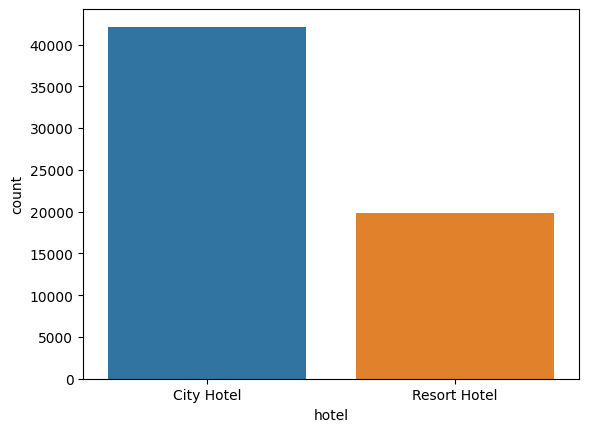

In [ ]:
sns.countplot(x='hotel', data=hoteles,)
plt.show()

In [ ]:
hoteles["hotel"].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Vemos que hay mas de el doble de reservas del City Hotel que del Resort Hotel.

**VARIABLE ARRIVAL_DATE_MONTH**

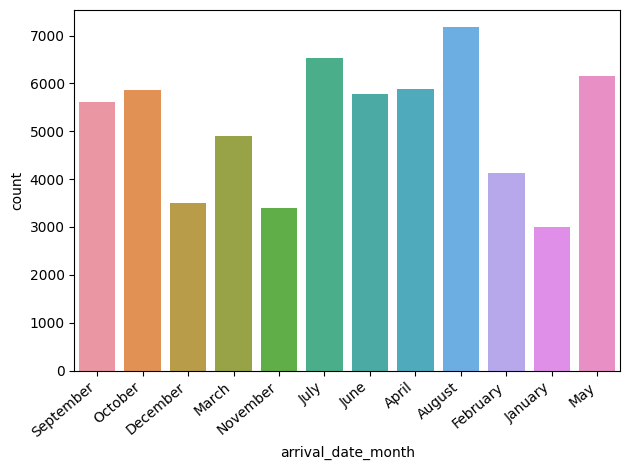

In [ ]:
arrival_date_month_grafic = sns.countplot(x='arrival_date_month', data=hoteles, )
arrival_date_month_grafic.set_xticklabels(arrival_date_month_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

La mayor cantidad de arrivos se dan en agosto.

**VARIABLE MEAL**

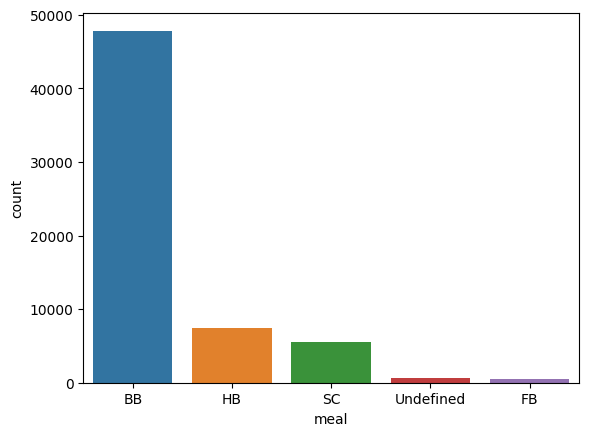

In [ ]:
sns.countplot(x='meal', data=hoteles, )
plt.show()

Como vemos el mayor tipo de comida en los hoteles es BB, luego le siguen HB y SC, y en ultimo lugar FB que tiene el mismo volumen que las comidas que no fueron registradas

**VARIABLE COUNTRY**

In [ ]:
hoteles["country"].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', nan, 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'P

Vemos que hay reservas de hotel en varios paises, hacemos un ranking de los 10 que mas aparecen

<Axes: xlabel='count', ylabel='country'>

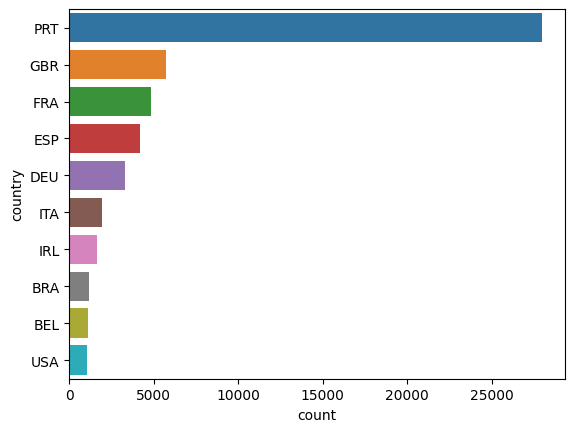

In [ ]:
sns.countplot(data=hoteles, y="country", order=hoteles.country.value_counts().iloc[:10].index)

El pais con mas reservas de hotel del dataset es Portugal, con mas de 25.000

VARIABLE MARKET SEGMENT

In [ ]:
hoteles["market_segment"].unique()

array(['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Complementary',
       'Corporate', 'Aviation', 'Undefined'], dtype=object)

Estas son todos los tipos de segmentos de mercado de todas las reservas de hotel del dataset

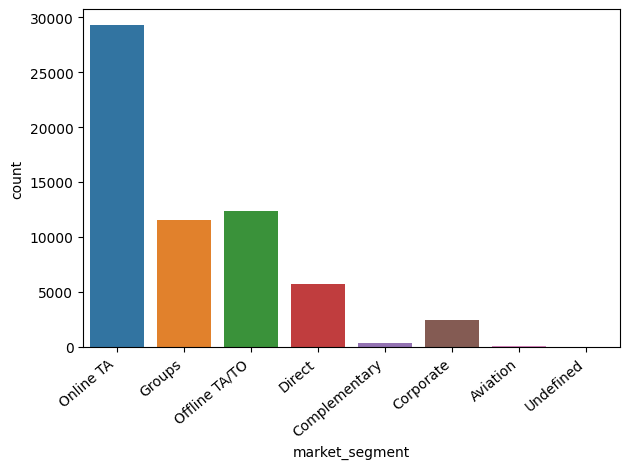

In [ ]:
market_segment_grafic = sns.countplot(x='market_segment', data=hoteles, )
market_segment_grafic.set_xticklabels(market_segment_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Vemos que Online TA es el segmento de mercado que está mas presente en todas las reservas de hotel

**VARIABLE DISTRIBUTION_CHANNEL**

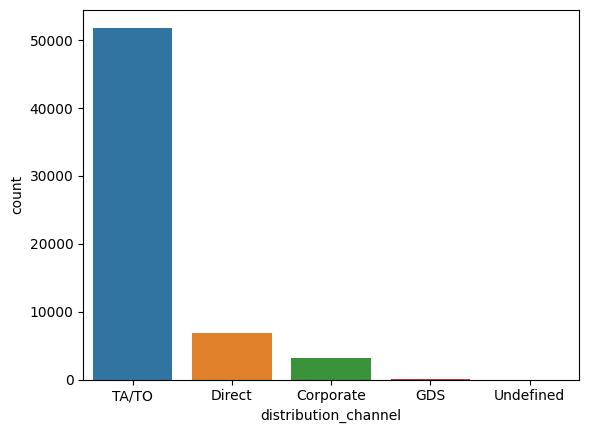

In [ ]:
sns.countplot(x='distribution_channel', data=hoteles, )
plt.show()

Vemos que el canal de distribucion que mas se repite en las reservas de hotel es TA/TO

**VARIABLE RESERVED_ROOM_TYPE**

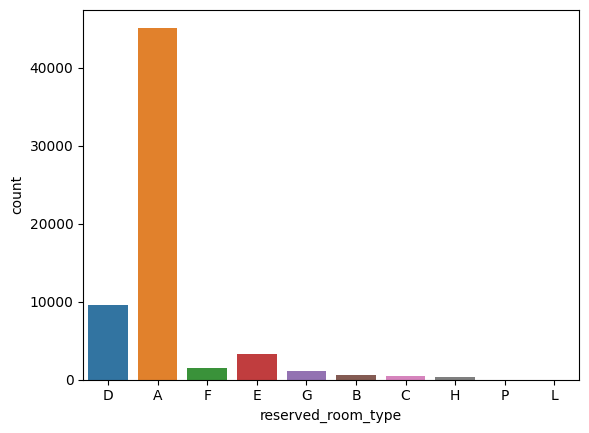

In [ ]:
sns.countplot(x='reserved_room_type', data=hoteles, )
plt.show()

Vemos que el tipo de reservas de habitacion son en su gran mayoria de tipo A

**VARIABLE ASSIGNED_ROOM_TYPE**

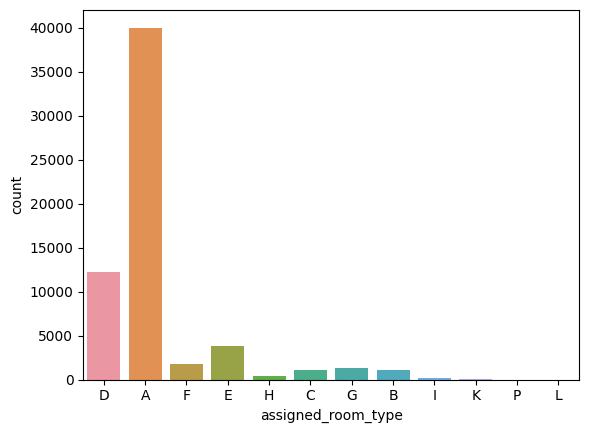

Cantidad de asignacion de habitacion de tipo D: 12190
Cantidad de reservas de habitacion de tipo D: 9585
Cantidad de asignacion de habitacion de tipo A: 40007
Cantidad de reservas de habitacion de tipo A: 45134


In [ ]:
sns.countplot(x='assigned_room_type', data=hoteles, )
plt.show()

print(f"Cantidad de asignacion de habitacion de tipo D: {hoteles['assigned_room_type'].value_counts()['D']}")
print(f"Cantidad de reservas de habitacion de tipo D: {hoteles['reserved_room_type'].value_counts()['D']}")

print(f"Cantidad de asignacion de habitacion de tipo A: {hoteles['assigned_room_type'].value_counts()['A']}")
print(f"Cantidad de reservas de habitacion de tipo A: {hoteles['reserved_room_type'].value_counts()['A']}")

Las distribuciones de los tipos de reserva y asignacion de habitaciones pueden parecer parecidas a simple vista por la escala de cantidad.

Observamos que la habitacion de tipo D tiene 2605 mas asignaciones que reservas.
Y la habitacion de tipo A tiene 5127 mas reservas que asignaciones

**VARIABLE DEPOSIT_TYPE**

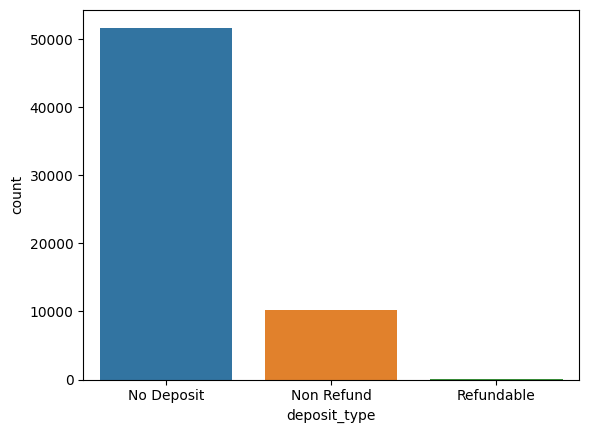

In [ ]:
sns.countplot(x='deposit_type', data=hoteles, )
plt.show()

Como vemos el el tipo de deposito mas comun es: No Deposit

**VARIABLE CUSTOMER_TYPE**

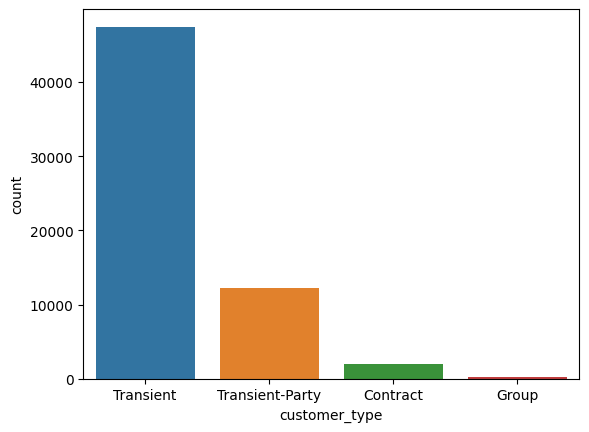

In [ ]:
sns.countplot(x='customer_type', data=hoteles, )
plt.show()

En el grafico se ve que el tipo de cliente mas habitual es el transitorio

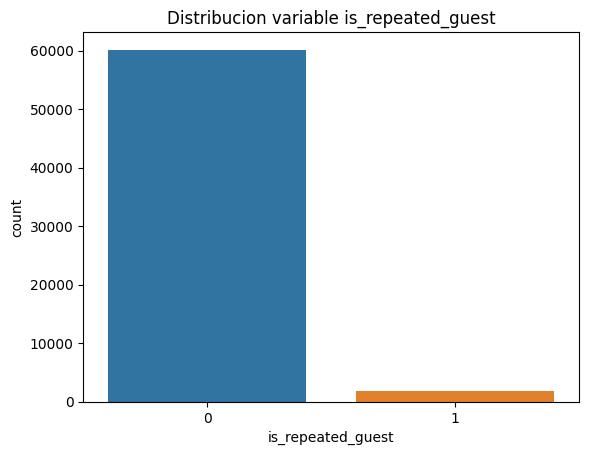

In [ ]:
sns.countplot(x='is_repeated_guest', data=hoteles)
plt.title("Distribucion variable is_repeated_guest")
plt.show()

Como vemos la mayoria de las reservas son de huespedes que no han reservado nunca

### Variables cuantitativas

Buscamos cuáles son las columnas numéricas del dataset

In [ ]:
hoteles_cuanti = hoteles[hoteles.select_dtypes(include=["int", "float"]).columns.to_list()].copy()
hoteles_cuanti.drop(columns="is_canceled", inplace=True)
hoteles_cuanti.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,49,2016,37,5,1,2,1,0.0,0,0,0,0,0,9.0,NaN,0,115.5,0,1
1,4,2015,44,31,0,1,2,0.0,0,0,0,0,0,NaN,NaN,0,42.0,1,0
2,25,2016,42,13,0,1,2,2.0,0,0,0,0,0,9.0,NaN,0,229.0,0,2
3,26,2016,51,12,2,5,2,0.0,0,0,0,0,0,154.0,NaN,0,75.0,0,0
4,104,2017,12,19,2,5,2,0.0,0,0,0,0,0,20.0,NaN,0,75.0,0,1


Calculamos la media, mediana y moda para cada variables

In [ ]:
df = pd.DataFrame()
df["media"] = hoteles_cuanti.mean().round(2)
df ["mediana"] = hoteles_cuanti.median()
df["moda"] = hoteles_cuanti.mode().squeeze()
df

,media,mediana,moda
lead_time,112.25,78.0,0.0
arrival_date_year,2016.15,2016.0,2016.0
arrival_date_week_number,27.22,28.0,33.0
arrival_date_day_of_month,15.79,16.0,17.0
stays_in_weekend_nights,0.92,1.0,0.0
stays_in_week_nights,2.51,2.0,2.0
adults,1.86,2.0,2.0
children,0.10,0.0,0.0
babies,0.01,0.0,0.0
is_repeated_guest,0.03,0.0,0.0


 **VARIABLE LEAD_TIME**

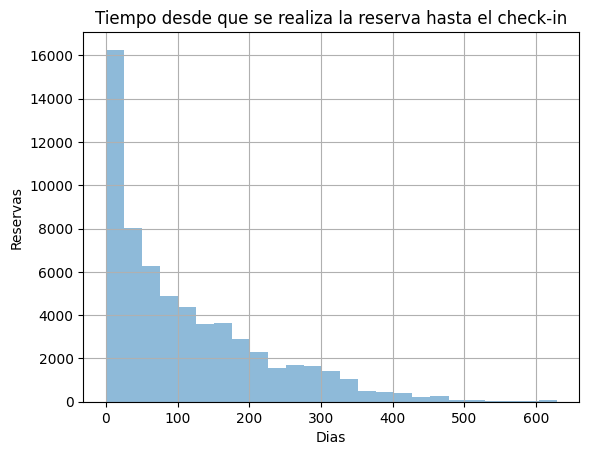

In [ ]:
plt.title('Tiempo desde que se realiza la reserva hasta el check-in')
plt.hist(hoteles_cuanti['lead_time'], bins = 25 , alpha = 0.5)
plt.xlabel("Dias")
plt.ylabel("Reservas")
plt.grid(True)
plt.show()

Podemos ver que en la mayor cantidad de observaciones se acerca a casi nulo tiempo de espera

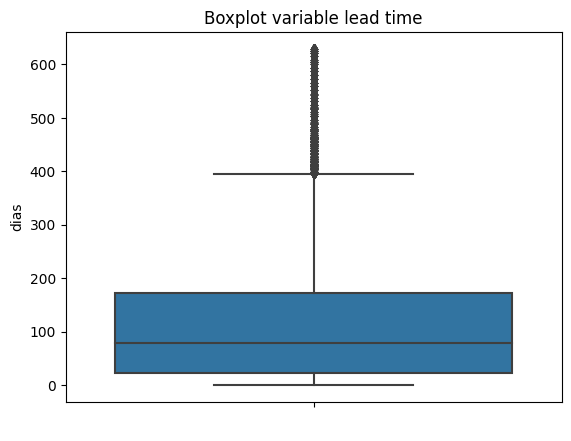

In [ ]:
grf=sns.boxplot(y="lead_time", data=hoteles_cuanti).set(title="Boxplot variable lead time",xlabel=" ",ylabel="dias")

Podemos ver que hay muchos outliers, queremos ver que porcentaje representan sobre el total

In [ ]:
cant_outliers = hoteles[hoteles['lead_time'] > 400.00]
cant_outliers.shape

(1291, 31)

Tenemos 1291 outliers

In [ ]:
filas_totales = hoteles.shape[0]
print(cant_outliers.shape[0]/filas_totales*100)

2.085184048584304


Representan un 2% del total de datos

**VARIABLE ARRIVAL_DATE_YEAR**




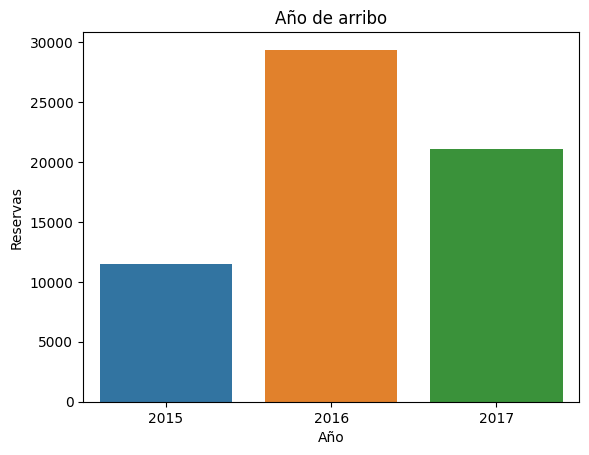

In [ ]:
sns.countplot(x='arrival_date_year', data=hoteles_cuanti)
plt.xlabel("Año")
plt.ylabel("Reservas")
plt.title("Año de arribo")
plt.show()

En 2016 hubo la mayor cantidad de huespedes.

**VARIABLE ARRIVAL_DATE_WEEK_NUMBER**

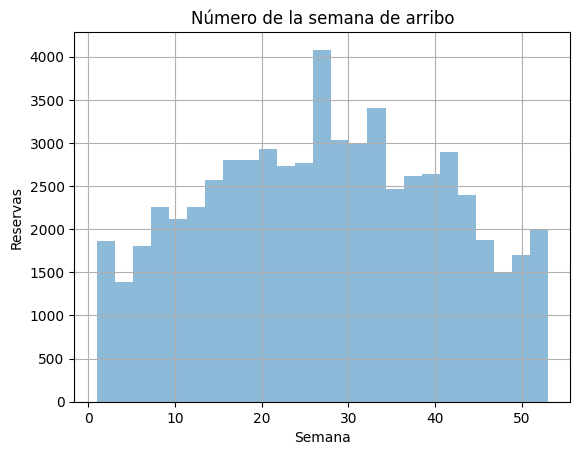

In [ ]:
plt.hist(hoteles_cuanti['arrival_date_week_number'], bins = 25, alpha = 0.5)
plt.xlabel("Semana")
plt.ylabel("Reservas")
plt.title("Número de la semana de arribo")
plt.grid(True)
plt.show()


Podemos ver que la mayor cantidad de gente llega a mitad de año

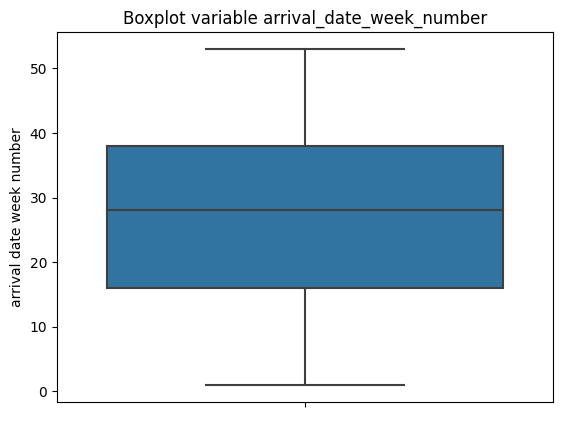

In [ ]:
grf=sns.boxplot(y="arrival_date_week_number", data=hoteles_cuanti).set(title="Boxplot variable arrival_date_week_number",xlabel=" ",ylabel="arrival date week number")

Vemos que no hay outliers

**VARIABLE ARRIVAL_DATE_DAY_OF_MONTH**

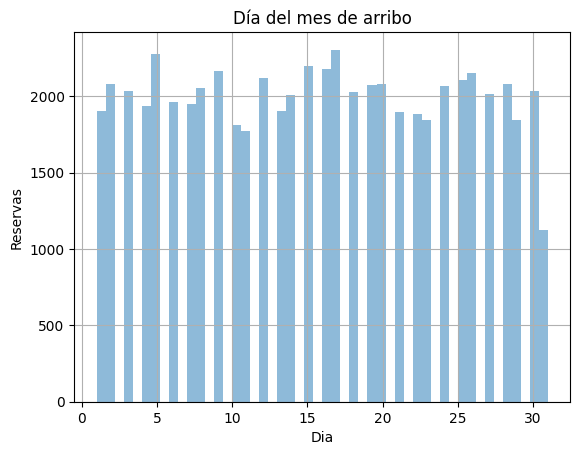

In [ ]:
plt.hist(hoteles['arrival_date_day_of_month'], bins = 50, alpha = 0.5)
plt.xlabel("Dia")
plt.ylabel("Reservas")
plt.title("Día del mes de arribo")
plt.grid(True)
plt.show()

No hay ninguna tendencia en cuanto a días del mes más reservados

Max dia:  31
Min dia:  1


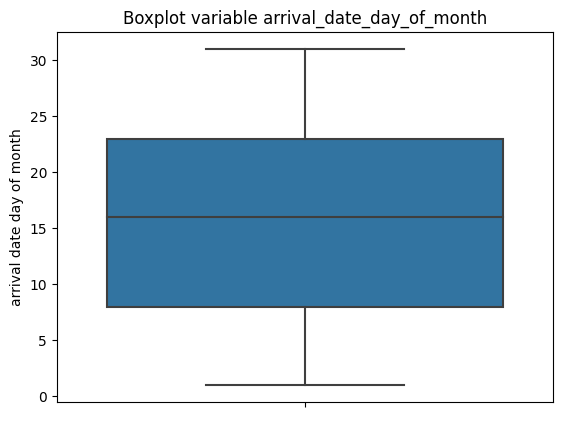

In [ ]:
grf=sns.boxplot(y="arrival_date_day_of_month", data=hoteles).set(title="Boxplot variable arrival_date_day_of_month",xlabel=" ",ylabel="arrival date day of month")
print("Max dia: ", max(hoteles_cuanti["arrival_date_day_of_month"]))
print("Min dia: ", min(hoteles_cuanti["arrival_date_day_of_month"]))

No hay valores outliers ya que el mínimo es 0 y el máximo es 31

**VARIABLE STAYS_IN_WEEKEND_NIGHTS**

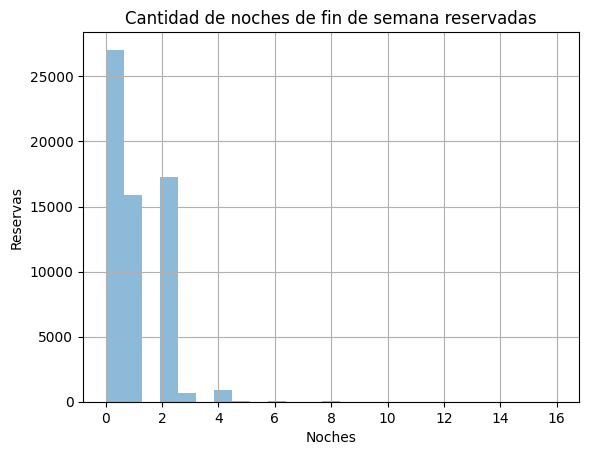

In [ ]:
plt.hist(hoteles_cuanti['stays_in_weekend_nights'], bins = 25, alpha = 0.5)
plt.xlabel("Noches")
plt.ylabel("Reservas")
plt.title("Cantidad de noches de fin de semana reservadas")
plt.grid(True)
plt.show()

La mayoría de las reservas no contienen noches del fin de semana

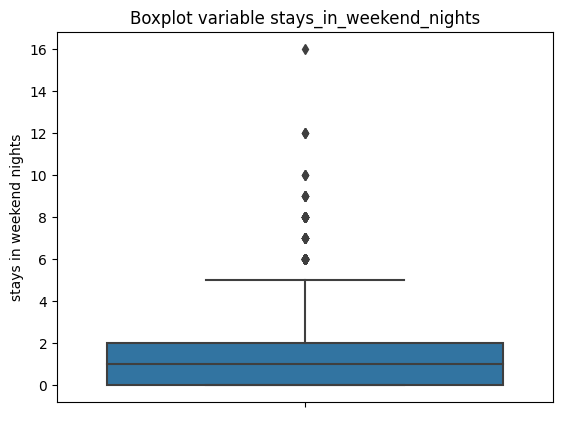

In [ ]:
grf=sns.boxplot(y="stays_in_weekend_nights", data=hoteles_cuanti).set(title="Boxplot variable stays_in_weekend_nights",xlabel=" ",ylabel="stays in weekend nights")

Vemos que hay valores de 12 y 16 dias de fin de semana, eso significa que se tuvo que quedar 6 y 8 fines de semana seguidos, lo cual es muy raro. Así que obtenemos la cantidad de noches de semana que se quedó

In [ ]:
hoteles_cuanti[["stays_in_weekend_nights","stays_in_week_nights"]].loc[hoteles_cuanti["stays_in_weekend_nights"]>10]

,stays_in_weekend_nights,stays_in_week_nights
31310,16,40
43667,12,30
54391,12,30
57428,12,30


A pesar de ser un valor alto, la cantidad de noches de semana reservadas concuerda por lo que podemos conlcuir que se trata de una reserva válida.

TODO: ver qué hacemos con este dato

**VARIABLE STAYS_IN_WEEK_NIGHTS**

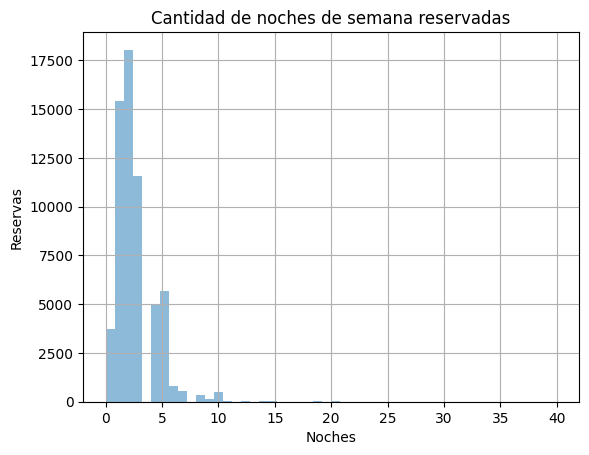

In [ ]:
plt.hist(hoteles_cuanti['stays_in_week_nights'], bins = 50, alpha = 0.5)
plt.xlabel("Noches")
plt.ylabel("Reservas")
plt.title("Cantidad de noches de semana reservadas")
plt.grid(True)
plt.show()

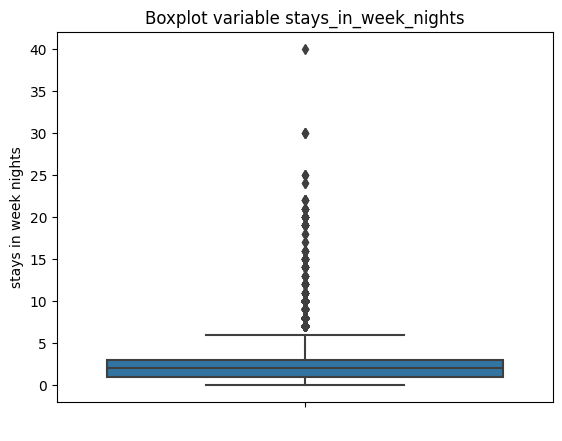

In [ ]:
grf=sns.boxplot(y="stays_in_week_nights", data=hoteles).set(title="Boxplot variable stays_in_week_nights",xlabel=" ",ylabel="stays in week nights")

In [ ]:
hoteles_cuanti["stays_in_week_nights"].describe()

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

De acuerdo a los gráficos, la mayor cantidad de gente suele quedarse entre 1 (lower Q1) y 3 noches (upper Q3)

**VARIABLE ADULTS**

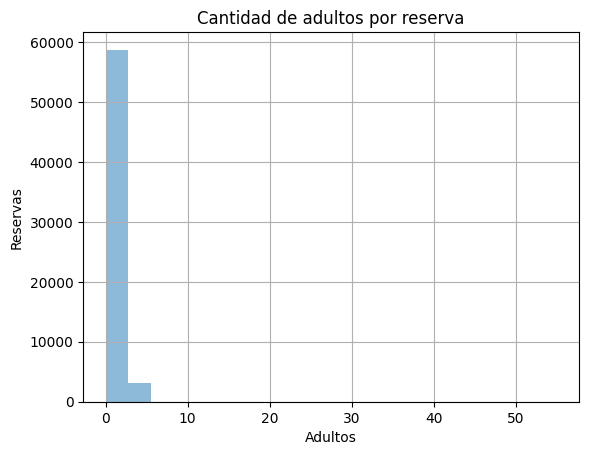

In [ ]:
plt.hist(hoteles_cuanti['adults'], bins = 20, alpha = 0.5)
plt.xlabel("Adultos")
plt.ylabel("Reservas")
plt.title("Cantidad de adultos por reserva")
plt.grid(True)
plt.show()

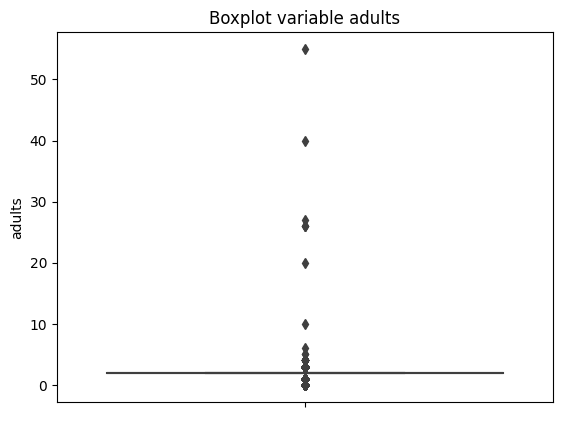

In [ ]:
grf=sns.boxplot(y="adults", data=hoteles).set(title="Boxplot variable adults",xlabel=" ",ylabel="adults")

Vemos que hay varios valores atipicos ya que la media es 1,8.

**VARIABLE CHILDREN**

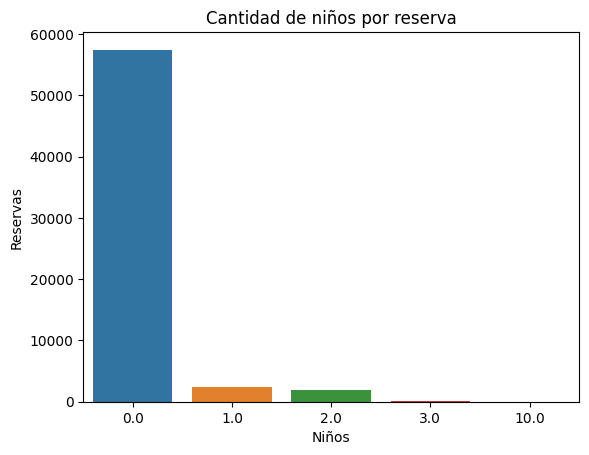

In [ ]:
sns.countplot(x='children', data=hoteles,)
plt.xlabel("Niños")
plt.ylabel("Reservas")
plt.title("Cantidad de niños por reserva")
plt.show()

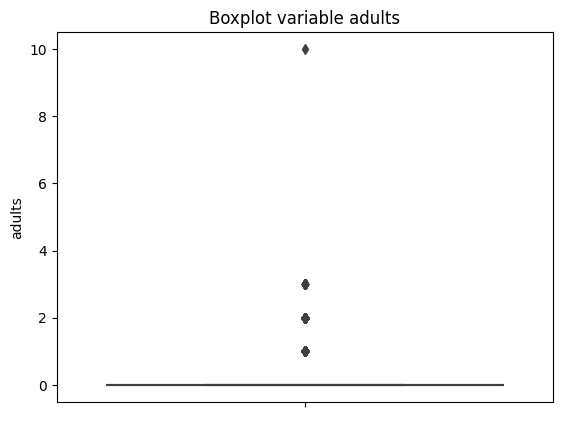

In [ ]:
grf=sns.boxplot(y="children", data=hoteles).set(title="Boxplot variable adults",xlabel=" ",ylabel="adults")

Hay valores atipicos pero son posibles. TODO: ver qué hacemos con esta y los bebes

**VARIABLE BABIES**


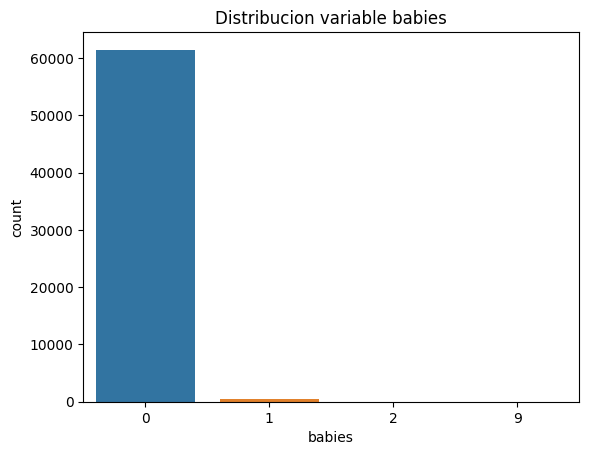

In [ ]:
sns.countplot(x='babies', data=hoteles_cuanti)
plt.title("Distribucion variable babies")
plt.show()

Como vemos la mayoria de las reservas tienen 0 bebes. Al ser tan distinta la escala en comparacion con las muestras con por lo menos 1 bebé, nos quedamos solo con estas (a partir de 1), para ver mejor la distribucion

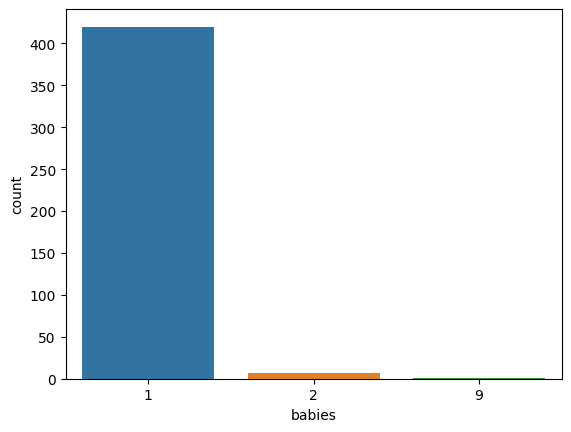

In [ ]:
hoteles_cuanti_0_babies = hoteles_cuanti.copy().loc[(hoteles_cuanti['babies']!=0)]
sns.countplot(x='babies', data=hoteles_cuanti_0_babies)
plt.show()

Vemos que, la mayoria de las reservas que tienen bebes son en su mayoria con solo 1.


In [ ]:
hoteles_cuanti[hoteles_cuanti['babies'] == 9]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
12659,11,2015,42,11,2,1,1,0.0,9,0,0,0,1,95.0,NaN,0,95.0,0,0


Analizando la unica reserva con 9 bebes, teniendo en cuenta de que hay un solo adulto y fué reservada con solo 11 dias de anticipacion. Deducimos que se trata de un error en la carga de la reserva por lo que eliminaremos esta reserva en el apartado de datos atipicos

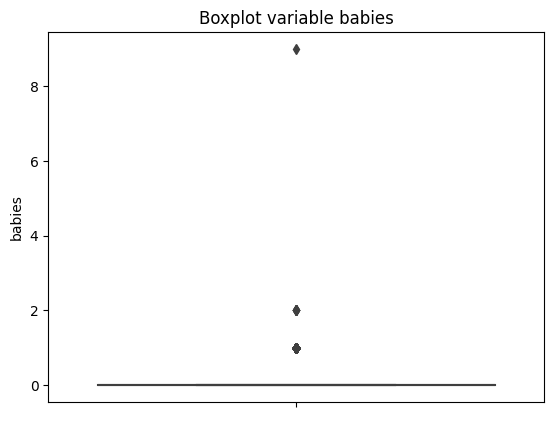

In [ ]:
grf=sns.boxplot(y="babies", data=hoteles_cuanti).set(title="Boxplot variable babies",xlabel=" ",ylabel="babies")

En el grafico boxplot se puede ver claramente el valor atipico de reserva con 9 bebes

**VARIABLE PreviousCancellations**

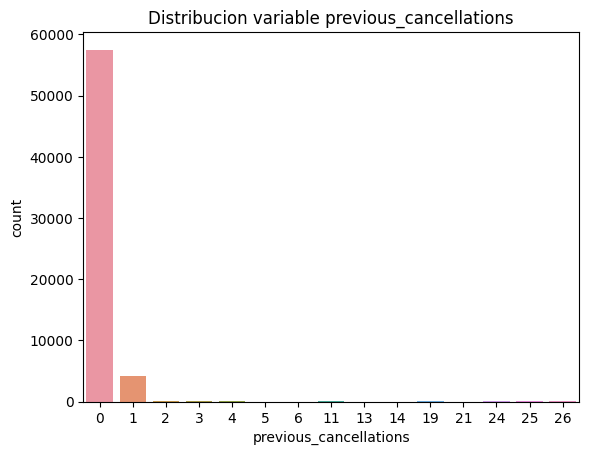

In [ ]:
sns.countplot(x='previous_cancellations', data=hoteles)
plt.title("Distribucion variable previous_cancellations")
plt.show()

La mayoria de la reservas nunca cancelaron, lo cual tiene sentido porque la mayoria de las reservas son de gente que nunca antes habia reservado. <br>
Despues observamos que de las reservas de gente que si canceló alguna previamente la mayor frecuencia es de una sola cancelacion. <br>
Para poder visualizar mejor la cantidad de reservas con mas numeros de cancelacoines, eliminamos estos dos valores analizados del grafico

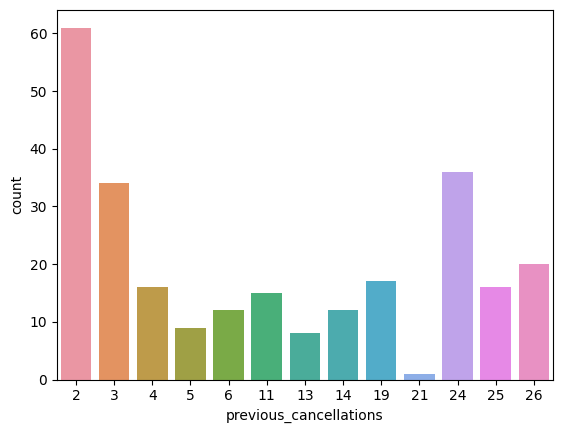

In [ ]:
hoteles_cancellations = hoteles.copy().loc[(hoteles['previous_cancellations'] !=1 ) & (hoteles['previous_cancellations'] != 0)]
sns.countplot(x='previous_cancellations', data=hoteles_cancellations)
plt.show()

Como vemos la cantidad de reservas con cancelaciones previas va en bajada desde 2 cancelaciones hasta 5. Apartir de ahi las cantidades empiezan a subir y bajar arbitrariamente por lo que consideramos que son valores mal cargados. Estas reservas van a ser eliminadas en el apartado de valores atipicos

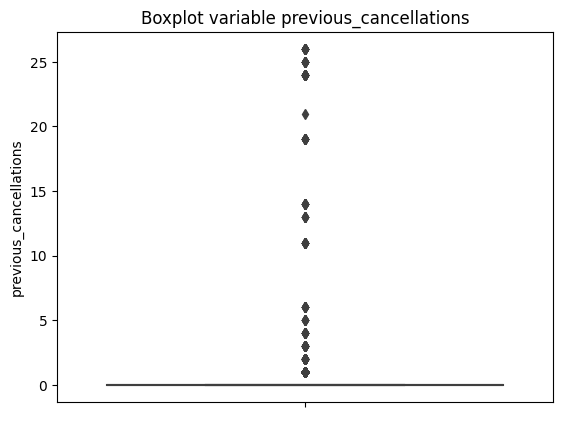

In [ ]:
grf=sns.boxplot(y="previous_cancellations", data=hoteles_cuanti).set(title="Boxplot variable previous_cancellations",xlabel=" ",ylabel="previous_cancellations")

**VARIABLE PREVIOUS_BOOKINGS_NOT_CANCELED**

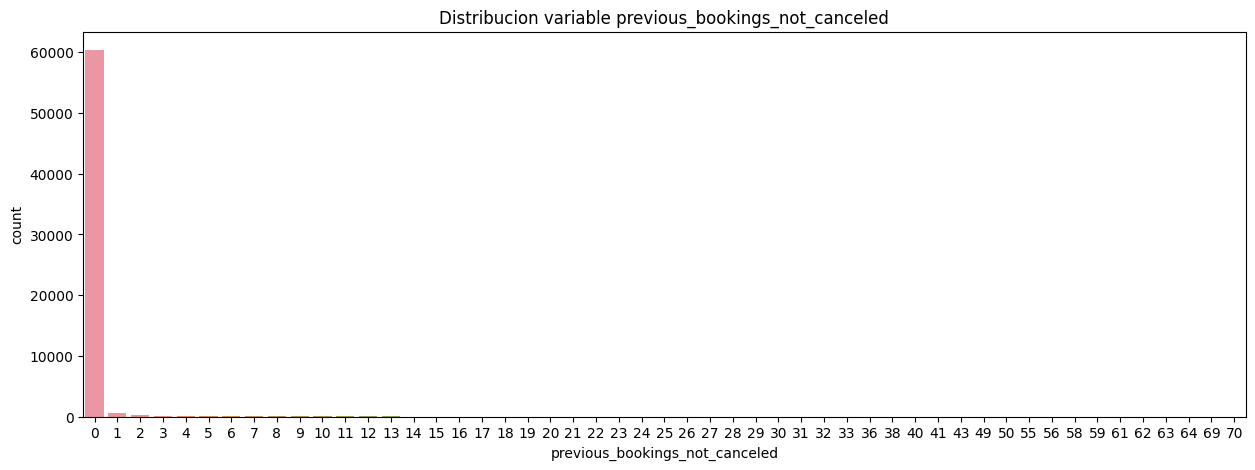

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='previous_bookings_not_canceled', data=hoteles)
plt.title("Distribucion variable previous_bookings_not_canceled")
#plt.xticks(rotation=90)
plt.show()

La mayoria de reservas no tienen previas reservas no canceladas, vamos a ver la distribucion de las que si

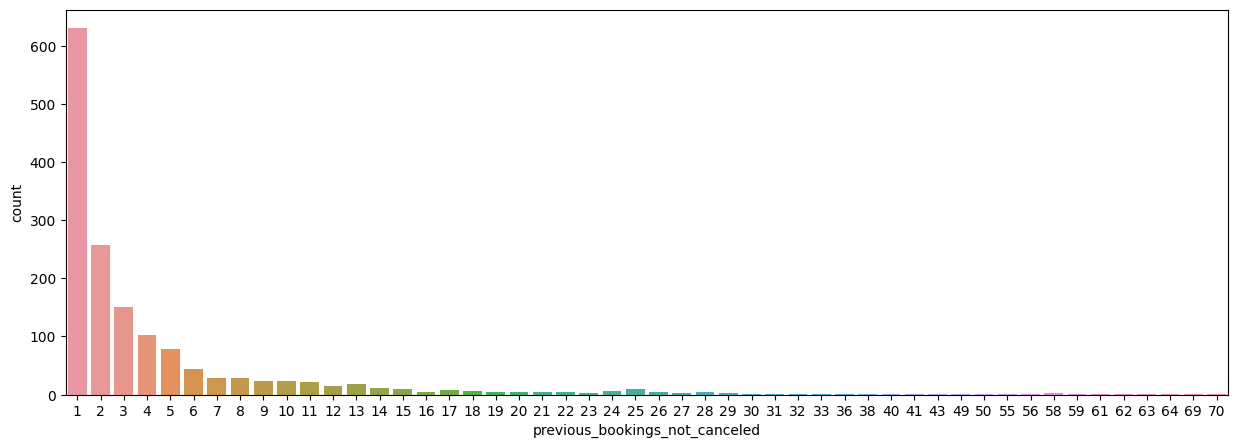

In [14]:
hoteles_not_cancellations = hoteles.copy().loc[hoteles['previous_bookings_not_canceled'] != 0]
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='previous_bookings_not_canceled', data=hoteles_not_cancellations)
plt.show()

## VISUALIZACION DE VARIABLES

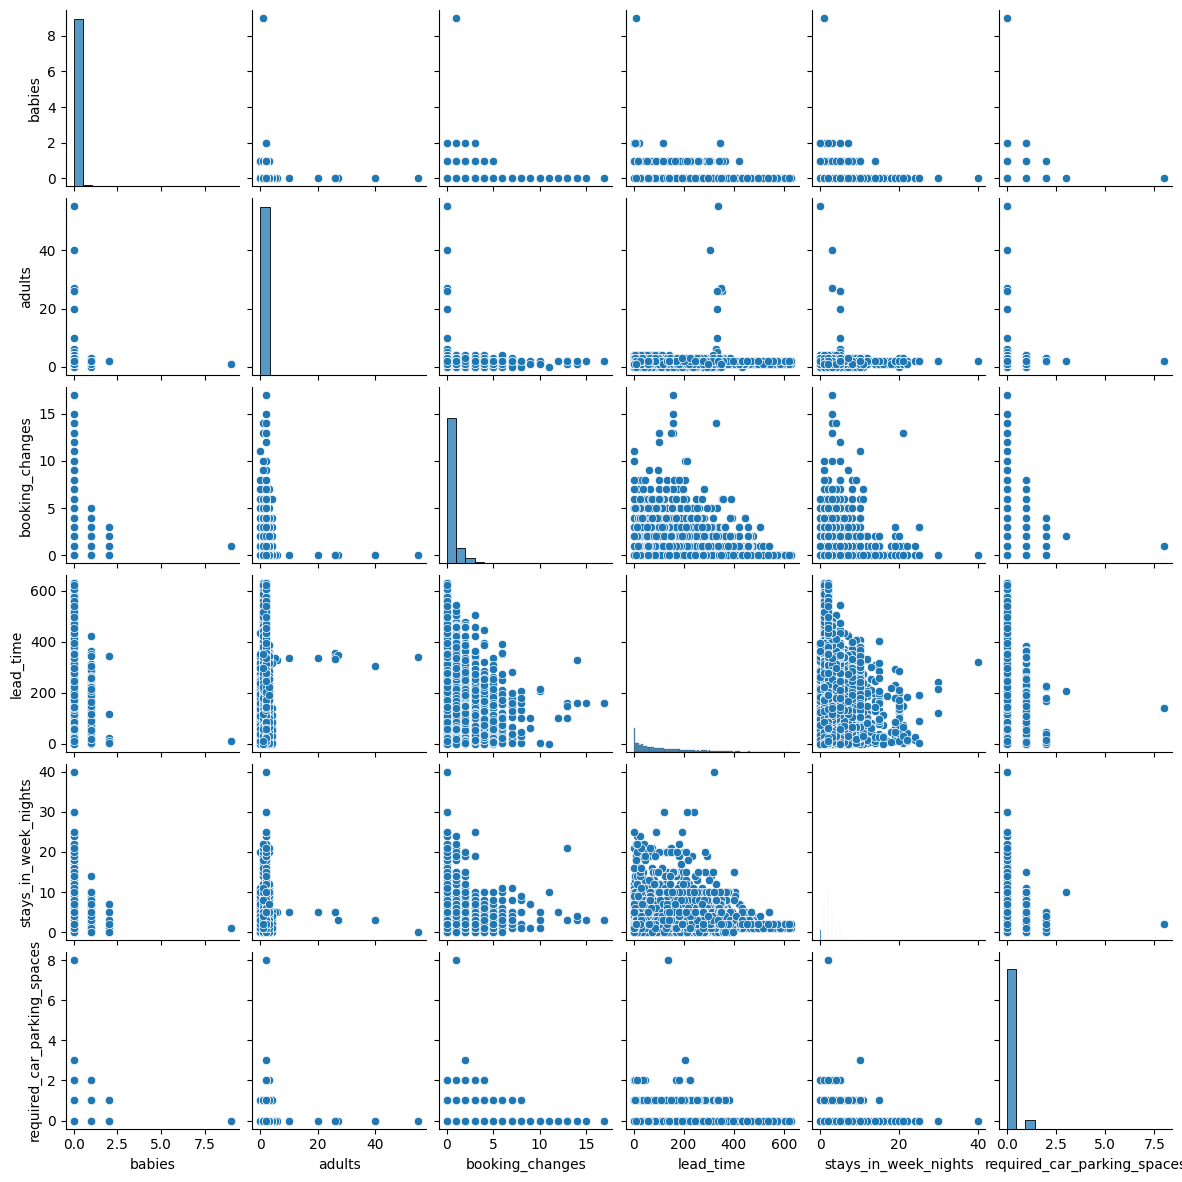

In [ ]:
sns.pairplot(hoteles[['babies', 'adults', 'booking_changes', 'lead_time', 'stays_in_week_nights', 'required_car_parking_spaces']], height=2)

## Datos Faltantes

In [ ]:
hoteles.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos que country, agent y company tienen mayor cantidad de valores faltantes

Veamos que porcentaje de datos faltantes hay sobre el total en cada columna

In [ ]:
filas_totales=hoteles.shape[0]
print(hoteles.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

**TO DO: GRAFICAR PORCENTAJE DE DATOS FALTANTES**

In [ ]:
print("Porcentaje de valores faltantes sobre el total:")
print("Porcentaje agent:  12,71%")
print("Porcentaje company:  94,88%")

Porcentaje de valores faltantes sobre el total:
Porcentaje agent:  12,71%
Porcentaje company:  94,88%


Podemos ver que la variable company en su mayoria esta sin valor, por la que podriamos tomar la decision de eliminarla.

En cambio en agent podriamos ver algun metodo para rellenar los datos faltantes.

Vemos si existen filas duplicadas

In [ ]:
hoteles[hoteles.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No existen filas duplicadas

# Valores atipicos

In [ ]:
hoteles_cuanti_invalido = hoteles_cuanti.copy()

hoteles_cuanti_invalido = hoteles_cuanti_invalido[(hoteles_cuanti_invalido["adults"] == 0) & ((hoteles_cuanti_invalido["children"] > 0) | (hoteles_cuanti_invalido["babies"] > 0)) ]

hoteles_cuanti_invalido.shape

(121, 21)

Podemos ver que hay 94 filas en las cuales no hay adultos pero si hay chicos o bebes. Esto no podria ser posible

TO DO: Decidir si eliminar estos valores
TO DO: eliminar reserva que tiene 9 bebes

En esta seccion vamos a citar las deducciones hechas en el analisis de las variables cuantitativas y cualitativas, ya que en esa seccion (a traves de los graficos) pudimos deducir los valores atipicos. Acá solo vamos a eliminar dichas muestras

# Relación entre variables

In [ ]:
matriz_corr=hoteles_cuanti.corr()
matriz_corr

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,...,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,...,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,...,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,...,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,...,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,...,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,...,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,...,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,...,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,...,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


<Axes: >

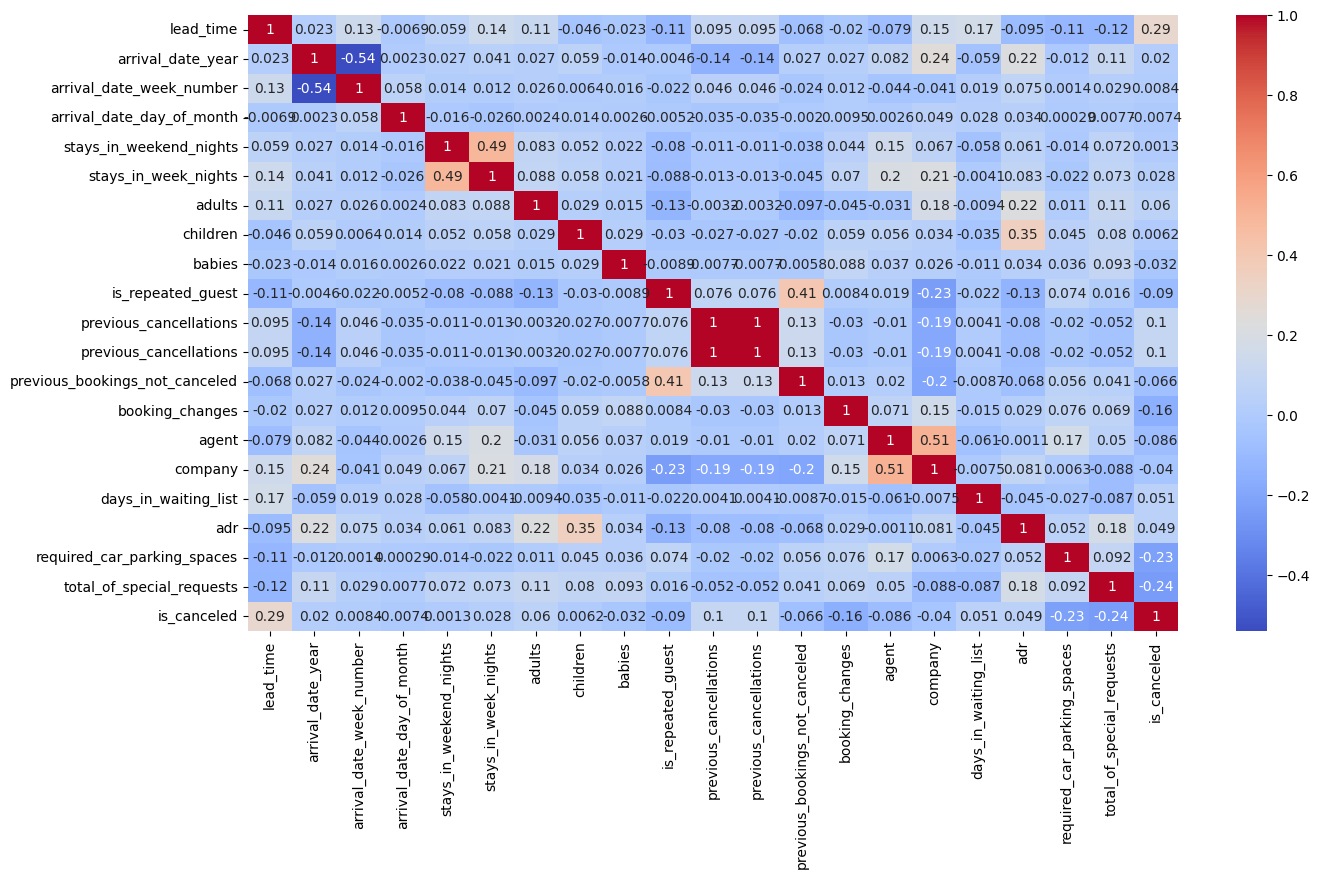

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

# Graficos de densidad

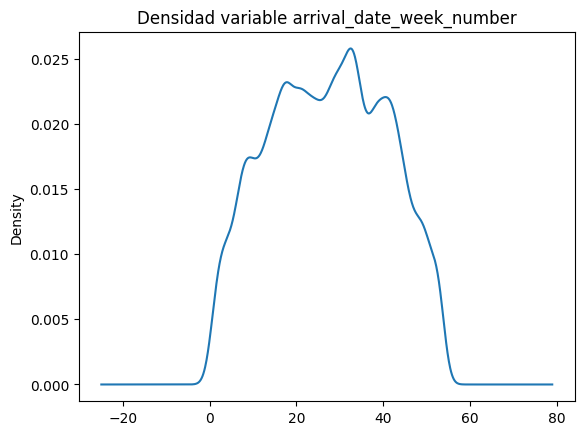

In [ ]:
grf=hoteles['arrival_date_week_number'].plot.kde(title="Densidad variable arrival_date_week_number",xlabel="",ylabel="Densidad")

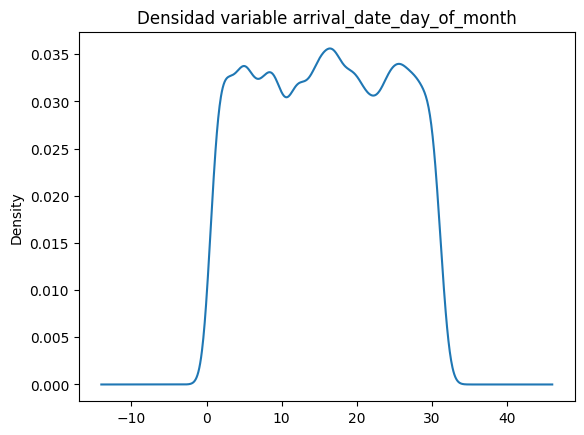

In [ ]:
grf=hoteles['arrival_date_day_of_month'].plot.kde(title="Densidad variable arrival_date_day_of_month",xlabel="",ylabel="Densidad")

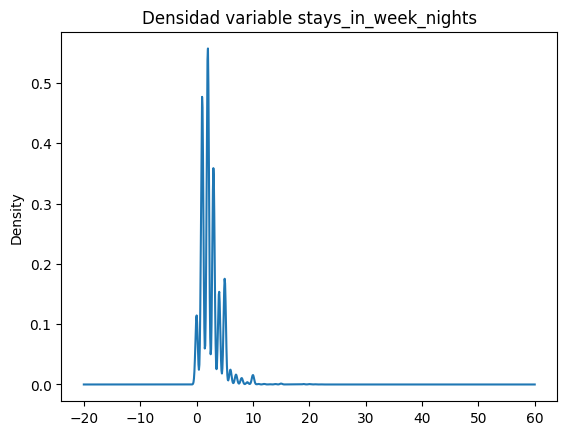

In [ ]:
grf=hoteles['stays_in_week_nights'].plot.kde(title="Densidad variable stays_in_week_nights",xlabel="",ylabel="Densidad")

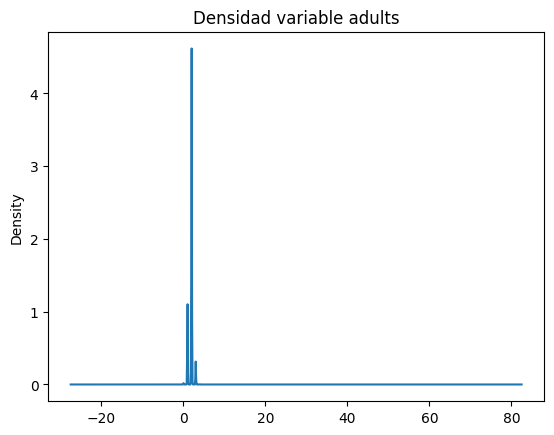

In [ ]:
grf=hoteles['adults'].plot.kde(title="Densidad variable adults",xlabel="",ylabel="Densidad")

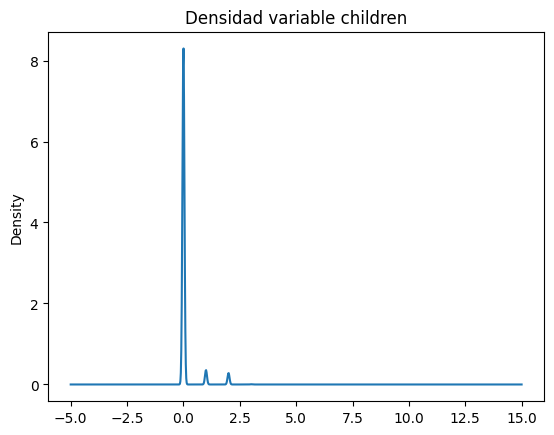

In [ ]:
grf=hoteles['children'].plot.kde(title="Densidad variable children",xlabel="",ylabel="Densidad")